### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

### ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


#### Дисциплина: Методы машинного обучения

##### Студент: Мухамедияр Адиль
##### Группа: НКНбд-01-20

## Москва 2023
***

# Постановка задачи:

В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:  

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.

2. Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

3. Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.

4. Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.

5. Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках.

6. Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом.

7. Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети.

8. Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

9. Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке.

10. Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

# Вариант №11



### Дополнение к основной задаче:

1. Набор данных: penguins.
2. Независимые признаки: V0, V2.
3. Метка класса: species.
4. Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64.

## Решение:

In [ ]:
# Добавляем библиотеки, которыми мы воспользуемся в дальнейшем:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
from mpl_toolkits.mplot3d import Axes3D

### Пункт 1

In [ ]:
# Загружаем набор данных "Пингвины", независимые признаки и метку класса:
ds = tfds.load("penguins", split='train')
df_1 = tfds.as_dataframe(ds)

df_1 = tfds.as_dataframe(ds)

# Добавляем четыре(V0, V1, V2 и V3) новых признака и убираем столбец "features":
for i in range(4):
    df_1['V'+str(i)] = df_1['features'].apply([lambda x:x[i]])
df_1.drop(columns=['features'],inplace=True)

df_1.head()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/334 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/penguins/processed/1.0.0.incompleteNY6O9A/penguins-train.tfrecord*...:   0…

Dataset penguins downloaded and prepared to /root/tensorflow_datasets/penguins/processed/1.0.0. Subsequent calls will reuse this data.


,species,V0,V1,V2,V3
0,2,0.654545,0.226190,0.898305,0.638889
1,2,0.360000,0.047619,0.644068,0.402778
2,2,0.680000,0.309524,0.915254,0.694444
3,2,0.618182,0.202381,0.813559,0.680556
4,2,0.552727,0.261905,0.847458,0.708333


In [ ]:
df_1.species.value_counts()

0    146
2    120
1     68
Name: species, dtype: int64

Оставим в наборе данных два независимых признака features/V0 и features/V2 и метки классов species:

In [ ]:
df = df_1[['V0','V2','species']]
df.columns = ['V0','V2','species']

df.head()

,V0,V2,species
0,0.654545,0.898305,2
1,0.360000,0.644068,2
2,0.680000,0.915254,2
3,0.618182,0.813559,2
4,0.552727,0.847458,2


### Пункт 2

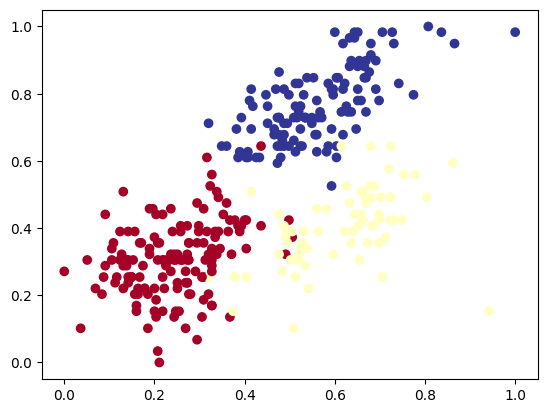

In [ ]:
plt.scatter(df['V0'], df['V2'], c = df['species'], cmap = plt.cm.RdYlBu)

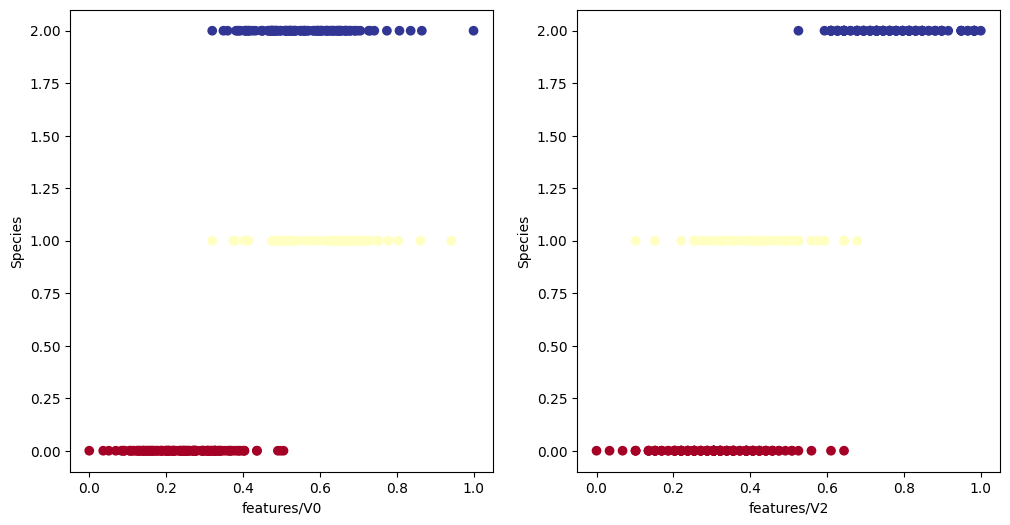

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Построим первую точечную диаграмму(для V0)
ax1.scatter(df['V0'], df['species'], c=df['species'], cmap=plt.cm.RdYlBu)
ax1.set_xlabel('features/V0')
ax1.set_ylabel('Species')

# Построим вторую точечную диаграмму(для V2)
ax2.scatter(df['V2'], df['species'], c=df['species'], cmap=plt.cm.RdYlBu)
ax2.set_xlabel('features/V2')
ax2.set_ylabel('Species')

plt.show()

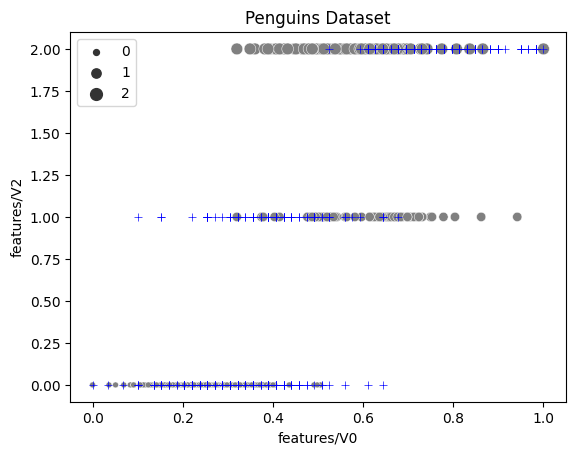

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='V0', y='species', color='gray', size='species')
sns.scatterplot(data=df, x='V2', y='species', color='blue', marker='+')
plt.xlabel('features/V0')
plt.ylabel('features/V2')
plt.title('Penguins Dataset')
plt.show()

### Пункт 3

Оценим количество записей с различными значениями признака species:

In [ ]:
df['species'].unique()

array([2, 0, 1])

In [ ]:
df['species'].value_counts()

0    146
2    120
1     68
Name: species, dtype: int64

Объединяем классы:

In [ ]:
print((df['species'].apply(lambda x: 1 if x > 0 else 0).value_counts()))
df.loc[:, 'species'] = df['species'].apply(lambda x: 1 if x > 0 else 0)


1    188
0    146
Name: species, dtype: int64


<ipython-input-9-07511fbd3b59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'species'] = df['species'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
df['species'].value_counts()

1    188
0    146
Name: species, dtype: int64

### Пункт 4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['V0','V2']],df['species'], test_size=0.4, random_state=42)

X_train.shape

(200, 2)

In [ ]:
# Слой нормализации:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X_train.shape[1],)) 
feature_normalizer.adapt(X_train)

Создадаем нейронную сеть со слоем нормализации, четырьмя скрытыми плотными слоями с 64 нейронами и функцией активации ReLu и выходным слоем из одного нейрона с функцией активации сигмоида:

In [ ]:
model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                        

Используем в качестве функции потерь при работе с задачами бинарной классификации `binary_crossentropy`. Для отслеживания показателя аккуратности (accuracy) во время обучения:

In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history = model.fit(X_train, y_train, epochs=3)

Epoch 1/3
7/7 [==============================] - 3s 6ms/step - loss: 0.3203 - accuracy: 0.8500
Epoch 2/3
7/7 [==============================] - 0s 4ms/step - loss: 0.1333 - accuracy: 0.9700
Epoch 3/3
7/7 [==============================] - 0s 3ms/step - loss: 0.1160 - accuracy: 0.9700


Значения, которые можно интерпретировать как вероятности при помощи обученной нейронной сети:

In [ ]:
prediction = model.predict(X_test)
prediction

5/5 [==============================] - 0s 5ms/step


array([[4.33107107e-06],
       [9.99334157e-01],
       [9.99999881e-01],
       [9.99746799e-01],
       [5.73555194e-03],
       [1.27997453e-04],
       [1.07650404e-08],
       [9.86444771e-01],
       [1.00000000e+00],
       [9.99870241e-01],
       [4.30236454e-04],
       [7.49780838e-07],
       [1.00000000e+00],
       [9.99995172e-01],
       [9.55632686e-07],
       [1.53016089e-08],
       [9.99999881e-01],
       [1.00000000e+00],
       [8.62625820e-05],
       [9.99722183e-01],
       [7.68920572e-08],
       [1.95870398e-05],
       [9.99097347e-01],
       [9.99999642e-01],
       [4.35647891e-08],
       [3.06422383e-01],
       [1.24481967e-05],
       [9.99956667e-01],
       [2.15621867e-08],
       [9.94038701e-01],
       [9.99458253e-01],
       [7.09196478e-02],
       [1.80088726e-08],
       [9.99999881e-01],
       [2.20236740e-09],
       [9.99990642e-01],
       [9.99999583e-01],
       [9.99452889e-01],
       [9.99999762e-01],
       [9.84368920e-01],


In [ ]:
y_pred = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction)])
print(y_pred)

[0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1
 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1
 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1
 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1]


Оценим модель на тестовой выборке:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

5/5 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 0.9627


(0.12497681379318237, 0.9626865386962891)

Теперь определим матрицу ошибок для бинарной классифкации, где:

* $TP$ – (True Positives) – число корректно спрогнозированных точек в классе $c_{1}$ 
* $FN$ – (False Negatives) – число точек в классе $c_{1}$, ошибочно спрогнозированных в класс $c_{2}$
* $FP$ – (False Positives) – число точек в классе $c_{2}$, ошибочно спрогнозированных в класс $c_{1}$
* $TN$ – (True Negatives) – число корректно спрогнозированных точек в классе $c_{2}$ 

In [ ]:
# TN:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

# FP:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

# FN:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

# TP:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

# Матрица ошибок для бинарной классификации:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TP(y_true, y_predict), FN(y_true, y_predict)],
        [FP(y_true, y_predict), TN(y_true, y_predict)]
    ])
# Выводим результат:
confusion_matrix(y_test, y_pred)

array([[75,  3],
       [ 2, 54]])

### Пункт 5


Для визуализации областей принятия решения воспользуемся следующей функцией:

313/313 [==============================] - 1s 2ms/step


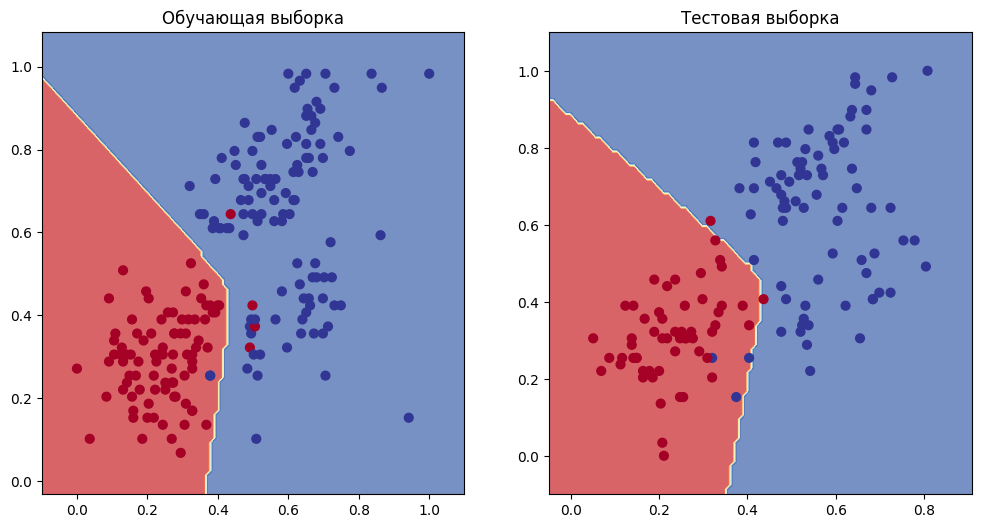

In [ ]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()] 
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация 
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model, X=X_test, y=y_test)

### Пункт 6


Показатель  FPR  откладывается вдоль оси x, а показатель  TPR  – вдоль оси y. В результате получаем ROC кривую (кривую Лоренца).

5/5 [==============================] - 0s 3ms/step


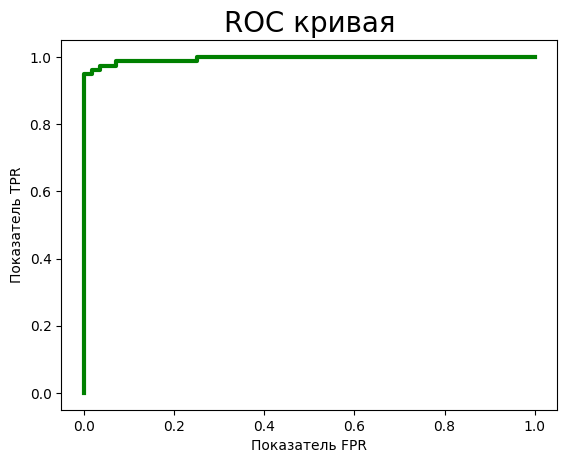

In [ ]:
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='green', lw=3)
plt.title('ROC кривая', fontsize=20)
# False Positive Rate
plt.xlabel('Показатель FPR')
# True Positive Rate
plt.ylabel('Показатель TPR')
plt.show()


### Пункт 7

In [ ]:
X = np.array(df_1.drop('species', axis=1))
y = np.array(df['species'])

X.shape

(334, 4)

In [ ]:
# Создадим и адаптируем слой нормализации для всех признаков:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X)

model_2 = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 4)                3         
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 8
Trainable params: 5
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Скомпилируем и обучим модель:
model_2.compile(loss=tf.keras.losses.binary_crossentropy)
model_2.fit(X, y, epochs=500, verbose=0);

# Посмотрим на значения весов в выходном слое:
model_2.layers[1].kernel

<tf.Variable 'dense_5/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[ 4.988406  ],
       [-2.1537004 ],
       [ 0.8455459 ],
       [-0.89959115]], dtype=float32)>

In [ ]:
df_1.columns

Index(['species', 'V0', 'V1', 'V2', 'V3'], dtype='object')

### Пункт 8

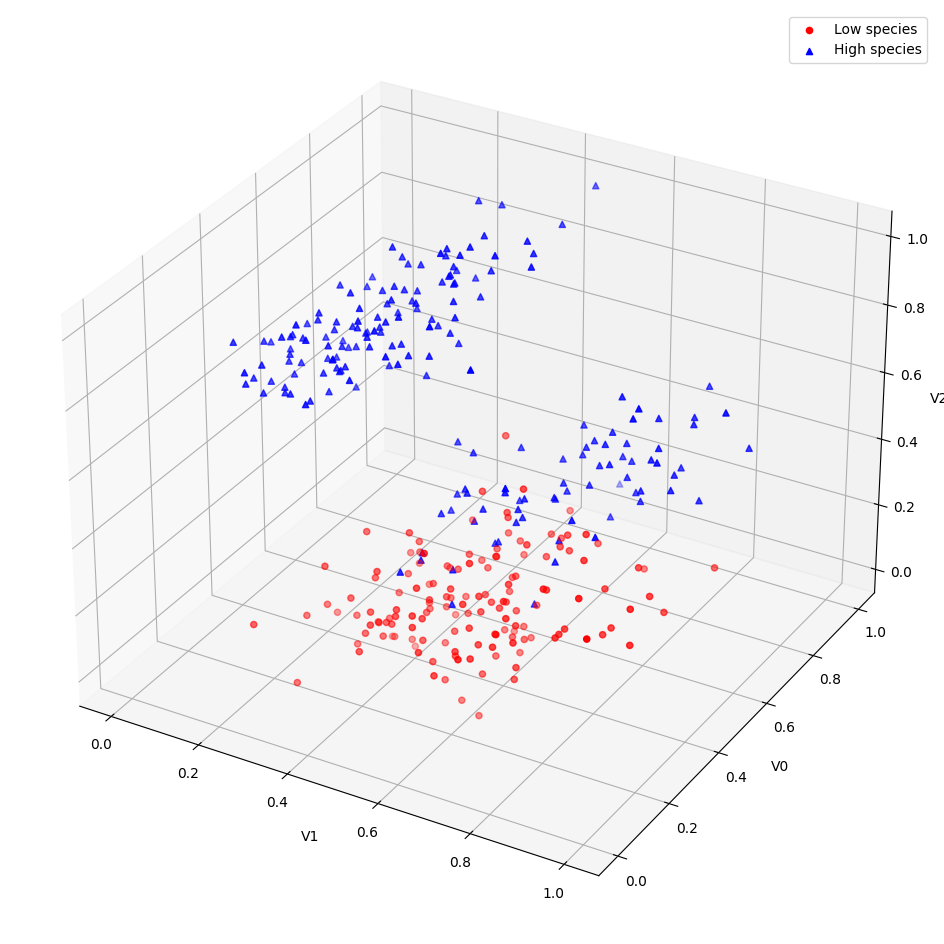

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_1['V1'][y==0], df_1['V0'][y==0], df_1['V2'][y==0], c='r', marker='o', label='Low species')
ax.scatter(df_1['V1'][y==1], df_1['V0'][y==1], df_1['V2'][y==1], c='b', marker='^', label='High species')

# Подписываем оси и добавляем легенду
ax.set_xlabel('V1')
ax.set_ylabel('V0')
ax.set_zlabel('V2')
ax.legend()

plt.show()

### Пункт 9

In [ ]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(df_1[["V0","V1","V2",'V3']], to_categorical(df_1['species']), test_size=0.3, random_state=30)
print(X_train.shape, y_test.shape)

(233, 4) (101, 3)


In [ ]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X_train.shape[1],)) 
feature_normalizer.adapt(X_train)

model = tf.keras.Sequential([

    feature_normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=50,
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 4)                3         
 ion)                                                            
                                                                 
 dense_11 (Dense)            (None, 64)                320       
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 3)                 195       
                                                      

### Пункт 10

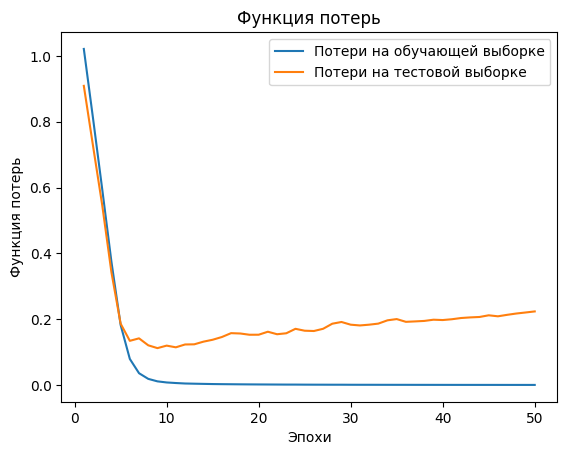

In [ ]:
epochs = range(1, len(history.history["loss"]) + 1)
plt.plot(epochs, history.history["loss"],  label="Потери на обучающей выборке")
plt.plot(epochs, history.history["val_loss"], label="Потери на тестовой выборке")
plt.title("Функция потерь")
plt.xlabel("Эпохи")
plt.ylabel("Функция потерь")
plt.legend();